---
title: "Duality Theory"
author: "Vahram Poghosyan"
date: "2022-01-23"
categories: ["Optimization"]
image: "introduction_to_optimization.png"
format:
  html:
    code-fold: true
jupyter: python3
include-after-body:
  text: |
    <script type="application/javascript" src="../../javascript/light-dark.js"></script>
---

# Introduction

Every convex optimization problem, designated as the ***primal***, has a related problem called its ***dual*** which can be colloquially thought of as its evil twin. The primal and the dual represent two different perspectives on the same problem. 

In the most general case, if the primal is a minimization problem, its dual is a maximization problem. In the case of constrained optimization, if the primal is minimization in $n$ variables and $m$ constraints then its dual is a maximization in $m$ variables and $n$ constraints. 

Furthermore, *any* feasible value of the dual is a lower-bound for *all* feasible values of the primal. In particular, should they both exist, the dual optimum is a lower bound for the primal optimum. This property, called ***weak duality***, lies at the core of ***duality theory***. The utility of formulating a problem whose solution obtains, at least, a lower-bound for the primal optimum and, in the special case, the primal optimum itself should be self-evident.

In the best case scenario a problem exhibits a property called ***strong duality***, which guarantees that the primal and the dual optima agree. Such problems are called ***strongly dual problems*** and include, but are not limited to, all linear programs (LPs) and a category of convex non-linear optimization problems. For strongly dual problems, solving the dual guarantees that we've also solved the primal. Furthermore, as we shall see, taking the dual of the dual gives back the primal. So this relationship is true in the converse — if we've solved the primal then we've also solved its dual.

This is what makes duality theory so useful in practice. Having a related, usually easier, optimization problem gives applied scientists a huge computational advantage. However, even if the dual does not turn out to be any easier to solve and/or strong duality fails to hold, we still stand to gain structural insight about the primal problem itself.

In this post we show how the dual of a problem arises, we examine its relationship with the primal, and list all possible primal-dual outcomes. In doing so, we look at duality in the general case of constrained optimization, in the specific case of linear programs, and in a category of unconstrained problems.

# The Dual of a Constrained Problem

First, let's focus on deriving the dual of a constrained optimization problem. We shall see that, in a sense, constraints are what give rise to duality through the [Lagrangian](https://en.wikipedia.org/wiki/Lagrangian_relaxation). Certain types of unconstrained problems also have duals which arise either from introducing dummy constraints, or directly through the [Fenchel-Legendre Transform](https://en.wikipedia.org/wiki/Convex_conjugate).

Take the most general form of a convex, constrained problem with $m$ inequality and $n$ equality constraints. To make the discussion interesting, assume the problem is non-trivial (i.e. its constraint set is non-empty and contains more than one feasible point). Furthermore, so that we may have a solution to speak of, assume the problem is bounded with the finite optimum $f_0(x^*)$ for some optimizer $x^*$.

$$
\begin{aligned}
\min_x &: f_0(x)
\\
s.t. &: \begin{aligned} &f_i(x) \leq 0 \ \ i = 1, ...,m
\\ 
&h_i(x) = 0 \ \ i = 1, ... ,p
\end{aligned}
\end{aligned}
$$

::: {.callout-tip title="Note" appearance="minimal" collapse="false"}
The $f_i$'s and the $h_i$'s in the constraints must necessarily be convex in order for their sublevel-sets, and hence the problem itself, to be convex. However, the equality constraints may be given as $Ax = b$ in some sources. These representations are practically almost equivalent. The $0$-th level-set of $Ax - b$, $\{ x : Ax = b\}$, is indeed a convex set. However, $h_i$'s in the equality constraints $h_i(x) = 0$ need not be linear for the $0$-th level-set, $\{ x : h_i(x) = 0 \}$, to be convex. For example, in $\mathbb{R}$, $x^2 = 0$ does represent a convex level-set. Note, however, that $x^2 = 0$ can be reduced to $x = 0$ which is, indeed, linear. To be precise, the notion of [quasi-linearity](https://en.wikipedia.org/wiki/Quasiconvex_function) is what's needed here. But, in practice, we simply *define* a general convex problem as having only linear equality constraints. Doing so assists in the analysis of problems and in the development of the computational methods that solve them.
:::

Since optimizing an unconstrained problem is considerably easier than optimizing one that is constrained, we seek to augment the constrained problem into an equivalent unconstrained problem.

The idea is to penalize infeasible $x$ using functions that express our *displeasure* for certain choices. 

At first we use the *infinitely-hard* penalty functions $\mathbb{1}_-$ and $\mathbb{1}_0$ which are defined as follows:

$$\mathbb{1}_-(u) = 
\begin{cases}
\begin{aligned} 
&0  &\textrm{if} \ u \leq 0
\\
&\infty  &\textrm{if} \ u > 0
\end{aligned}
\end{cases}$$
<br>
$$\mathbb{1}_0(u) = 
\begin{cases}
\begin{aligned} 
&0  &\textrm{if} \ u = 0
\\
&\infty  &\textrm{if} \ u \ne 0
\end{aligned}
\end{cases}$$

Then the equivalent unconstrained problem can be stated as:

$$\min_x: \mathcal{J}(x)$$

where $\mathcal{J}(x) = f_0(x) + \sum_{i=1}^m \mathbb{1}_-(f_i(x)) + \sum_{i=1}^p \mathbb{1}_0(h_i(x))$. 

Equivalently, by naming the primal feasible set $\mathcal{X}$, we can express the objective $\mathcal{J}(x)$ as:

$$
\mathcal{J}(x) = \begin{cases}\begin{aligned} 
&f_0(x) \ \ x \in \mathcal{X}
\\
&\infty \ \ \textrm{otherwise}
\end{aligned}\end{cases}
$$

Informally, if an $\hat x$ is chosen s.t *one or more* of the constraints are broken then the minimization incurs an infinitely positive penalty. Therefore, such a $\hat x$ will never be selected over any feasible choice, $x \in \mathcal{X}$, which gives a finite value of $f_0(x)$. Moreover, by optimality of $x^*$ in the original problem, we have $f_0(x) \leq f_0(x^*) \ \ \forall x$. So, the optimum of $\mathcal{J}$ will also be $f_0(x^*)$.

That is:

$$\min_x \mathcal{J}(x) = f_0(x^*) \tag{1}$$

Moreover, since the optimizer $x^*$ for the original problem is feasible, $\mathcal{J}(x^*) = f_0(x^*)$ by definition. It follows, by substitution into $(1)$, that:

$$\mathcal{J}(x^*) = \min_x \mathcal{J}(x) \tag{2.1}$$

Or, equivalently:

$$x^* = \arg \min_x \mathcal{J}(x) \tag{2.2}$$

$(1)$ says that it suffices to minimize the unconstrained objective $\mathcal{J}$ instead of the original problem since doing so yields $f_0(x^*)$, the optimum of the unconstrained problem. $(2.1)$ and $(2.2)$, on the other hand, say that it suffices to find an optimizer $x^*$ of the unconstrained problem, since such a point will also be an optimizer of the constrained problem.

To convince ourselves of this result, it helps to look at a simple example.

---

Consider minimizing the quadratic form $f_0(x) = ||x||_2^2$ in $\mathbb{R}^2$ subject to the single circular inequality constraint $x_1^2 + x_2^2 \leq 1$.Below are the 3D plots of the constrained and the unconstrained problem.

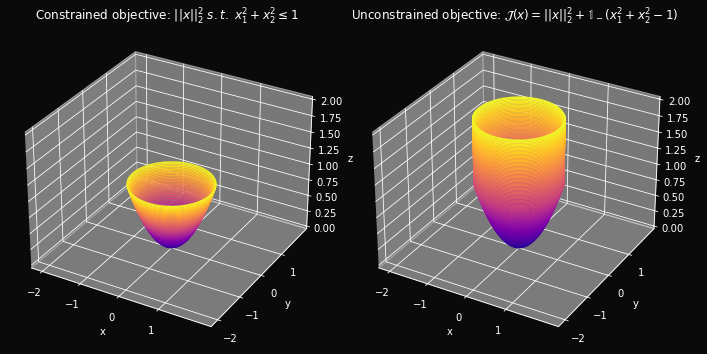

In [2]:
#| code-fold: true

# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Style Configurations
plt.rcParams['figure.autolayout'] = False
plt.style.use('dark_background')
figsize = (9.80, 4.90)
background = '#0a0a0a'

# Constrained objective function
def f(x,y):
    return x**2 + y**2

# Unconstrained augmentation of the objective 
def j(x, y):
    j = f(x,y) # The copy array takes the values of the objective in the feasible region
    mask = ~(x**2 + y**2 <= 1) # Infeasible region
    j[mask] = 2 # Value on infeasible region. Use 2 instead of np.inf for visual purposes
    return j

# Creating the data
x_min, x_max = -2, 2
y_min, y_max = -2, 2
x, y = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
z1 = np.ma.masked_where(~(x**2 + y**2 <= 1), f(x,y))
z2 = j(x,y)

# Creating the plot
fig = plt.figure(figsize = figsize, layout = 'tight')
fig.set_facecolor(background)

# First subplot
ax = fig.add_subplot(1, 2, 1, projection = '3d')
ax.contour3D(x, y, z1, 50, cmap = cm.plasma)
ax.set_zlim3d(0, 2)
ax.set_facecolor(background)
ax.set_title(r'Constrained objective: $||x||_2^2 \ s.t. \ x_1^2 + x_2^2 \leq 1$', pad = 5)
ax.set_xticks(np.arange(x_min, x_max, 1.0))
ax.set_yticks(np.arange(y_min, y_max, 1.0))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Second subplot
ax = fig.add_subplot(1, 2, 2, projection = '3d')
ax.contour3D(x, y, z2, 100, cmap = cm.plasma)
ax.set_zlim3d(0, 2)
ax.set_facecolor(background)
ax.set_title(r'Unconstrained objective: $\mathcal{J}(x) = ||x||_2^2 + \mathbb{1}_-(x_1^2 + x_2^2 - 1)$', pad = 5)
ax.set_xticks(np.arange(x_min, x_max, 1.0))
ax.set_yticks(np.arange(y_min, y_max, 1.0))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Display result
plt.show()

We can clearly see in the plots that the optimum and the optimizer are the same for both problems: namely, $f_0(x^*) = 0$ and $x^* = 0$.

---

As we know, the local optima of unconstrained problems occur at their *stationary points* which can be easily identified using the *unconstrained optimality condition*.

> **Unconstrained Optimality Condition:** &nbsp; If $x^*$ is an optimizer of the unconstrained objective $f_0(x)$ then $\nabla f_0(x^*) = 0$. That is $x^*$ is a ***stationary point*** of $f_0(x)$.

Once such stationary points have been found, a global minimizer can be identified among them simply by evaluating the objective at each stationary point.

However, we're immediately beset by a problem. We cannot find the gradient of $\mathcal{J}$ and set it to zero because the infinitely-hard penalty functions are discontinuous and non-differentiable. That is, $\nabla \mathcal{J}(x)$ simply does not exist.

To sidestep this difficulty we use linear relaxations instead of $\mathbb{1}_-$ and $\mathbb{1}_0$. 


## The Lagrangian, Dual Variables, and the Dual Function

The ***Lagrangian linear relaxation***, sometimes simply referred to as the ***Lagrangian***, is:

$$\mathcal{L}(x,\lambda,\mu) = f_0(x) + \sum_{i=1}^m \lambda_i f_i(x) + \sum_{i=1}^p \mu_i h_i(x)$$
$$\textrm{where} \ \lambda \geq 0$$

We call the $\lambda_i$'s the ***Lagrange multipliers*** corresponding to the inequality constraints, and the $\mu_i$'s those corresponding to the equality constraints. The vectors $\lambda$ and $\mu$, composed of these Lagrange multipliers, are called the ***Lagrange multiplier vectors*** or, for reasons that will soon become apparent, the ***dual variables***. 

::: {.callout-tip title="Note" appearance="minimal" collapse="false"}
In some sources, the Lagrangian is simply stated as $\mathcal{L}(x,\lambda) = f_0(x) + \sum_{i=1}^n \lambda_i f_i(x)$. Indeed, by separating the equality constraints $h_i(x) = 0$ into $h_i(x) \leq 0$ and $-h_i(x) \leq 0$, we can transform a problem with equality constraints into one with only inequality constraints. So, this formulation of the Lagrangian is still general enough to account for problems with equality constraints.
:::

## A Lagrangian Lower-Bound

Not only does the Lagrangian ($\mathcal{L}$) relax the unconstrained problem, it also plays a natural role in the formulation of the ***dual problem***.

The first thing to note about the Lagrangian is that the coordinate-wise $\lambda \geq 0$ condition is crucial. This is because, in the event that an inequality constraint is violated, say $f_i(x) > 0$, the corresponding $\lambda_i$ must be non-negative in order to apply a positive penalty to the minimization. On the other hand, $\mu$ is free to assume any value since the equality constraints can be violated in either direction and both scenarios must be positively penalized.

The second thing to note about the Lagrangian is that, even though it applies a positive penalty that scales linearly in the severity of the violation, this penalty is, nevertheless, not as severe as the infinite penalty applied in $\mathcal{J}$. Also, in the Lagrangian, we may actually be *rewarding* feasible choices of $x$ that have margin. That is, in the event that $f_i(x) < 0$, $\lambda_if_i(x)$ is a non-positive reward for the minimization problem. 

All of this is to say that $\mathcal{L}$ is a point-wise lower-bound on $\mathcal{J}$. That is, the following inequality holds:

$$\mathcal{L}(x,\lambda,\mu) \leq J(x) \ \ \forall x, \lambda \geq 0, \mu \tag{3.1}$$

This fact is also obvious by plotting each of the $m + p$ linear penalties, superimposing them against the plots of the corresponding infinitely hard penalty functions, and noticing that in each case $\lambda_i f_i(x) \leq \mathbb{1}_-(f_i(x))$ and $\mu_i h_i(x) \leq \mathbb{1}_0(h_i(x))$. 


Taking $\min$ w.r.t. $x$ of the LHS in $(3.1)$ we get:

$$\min_x \mathcal{L}(x,\lambda,\mu) \leq J(x) \ \ \forall x, \lambda \geq 0, \mu$$

Furthermore, restricting $x$ to the primal feasible set $\mathcal{X}$ on which $J(x) = f_0(x)$, we obtain something interesting:

$$\min_x \mathcal{L}(x,\lambda,\mu) \leq f_0(x) \ \ \forall x \in \mathcal{X}, \lambda \geq 0, \mu \tag{3.2}$$

::: {.callout-tip title="Note" appearance="minimal" collapse="false"}
The Lagrangian may not attain its $\min$ w.r.t. $x$, in which case the LHS is simply $-\infty$. We shall see later, once we define the ***dual function*** and the ***duality gap***, that this corresponds to the dual function being $-\infty$ $\forall \lambda \geq0, \mu$ and the duality gap being $\infty$. In a sense, this is a useless lower bound. So, for now, we assume the interesting case in which the minimum *is* attained and thus $\inf_x \mathcal{L}(x, \lambda, \mu) = \min_x \mathcal{L}(x, \lambda, \mu)$.
:::

Designating the original problem as the *primal*, we call $g(\lambda, \mu) := \min_x \mathcal{L}(x, \lambda, \mu)$ the ***dual function*** because it exhibits the aforementioned property of weak duality. That is, per $(3.2)$, any feasible value of $g(\lambda, \mu)$ is a lower-bound for any feasible value of the primal.

Taking min of the other side, we have a more specific flavor of weak duality:

$$g(\lambda,\mu) \leq \min_x f_0(x) \ \ \forall \lambda \geq 0, \mu$$

Or simply:

$$g(\lambda,\mu) \leq f_0(x^*) \ \ \forall \lambda \geq 0, \mu \tag{3.3}$$

That is, any feasible value of the dual is a lower-bound for the primal optimum.

Maximizing both sides of $(3.3)$ by noticing that the RHS is a constant, and by assuming the LHS attains its $\max$ we get an even more specific flavor of weak duality:

$$\max_{\lambda \geq 0, \mu} g(\lambda,\mu) \leq f_0(x^*)$$

Or simply, assuming $\lambda^*$ and $\mu^*$ to be dual-optimal:

$$g(\lambda^*, \mu^*) \leq f_0(x^*) \tag{3.4}$$

That is, the dual optimum is a lower-bound for the primal optimum.

From here we move, quite naturally, to defining the *dual problem*.

## The Lagrange Dual Problem

It's natural, to ask what the *tightest* lower bound on the primal optimal value $f_0(x^*)$ is. This amounts to finding the values $\lambda^* \geq 0$, and $\mu^*$ for which $g(\lambda^*, \mu^*)$ is maximized. We call this the ***Lagrange dual problem*** or, simply, the ***dual problem***.

It can be stated as:

$$
\begin{aligned}
\max_{\lambda, \mu} &: g(\lambda, \mu)
\\
s.t. &: \lambda \geq  0
\end{aligned}
$$

Looking at the above, it becomes immediately clear why we were motivated to call $\lambda$, and $\mu$ the *dual variables*: they are the variables of the dual problem.

# Weak Duality and Interpretations

We now return to the general setting of constrained optimization.

We've already seen weak duality formulated as $(3.2)$, $(3.3)$, and $(3.4)$. But, there's yet another, more symmetric, formulation of weak duality.

Suppose $x^*$ and $(\lambda^*, \mu^*)$ are primal-dual optimal. Since $g(\lambda^*, \mu^*)$ is the solution to the dual, and $g(\lambda, \mu) = \min_x \mathcal{L}(x, \lambda, \mu)$ we have:

$$g(\lambda^*, \mu^*) = \max_{\lambda \geq 0, \mu} \left\{ \min_x \mathcal{L}(x, \lambda, \mu) \right\} \tag{4.1}$$

Similarly, it can be shown that:

$$f_0(x^*) = \min_x \left\{ \max_{\lambda \geq 0, mu} \mathcal{L}(x, \lambda, \mu) \right\} \tag{4.2}$$

To see this, note that for some $x$ fixed by the outer minimizer, maximizing the Lagrangian over $\lambda \geq 0$ and $\mu$ recovers $\mathcal{J}(x)$. 

If all of the inequality constraints are respected, that is $f_i(x) \leq 0$ $\forall i$, then, in order to maximize the Lagrangian, the best we can do is set $\lambda_i = 0$ $\forall i$. In case *any* inequality constraint is violated, that is $f_i(x) > 0$ for some $i$, the result of maximizing the Lagrangian can be made $\infty$ by choosing $\lambda_i \rightarrow \infty$ and $\lambda_j = 0$ $\forall j \ne i$. 

Using similar logic, if all equality constraints are respected then $h_i(x) = 0$ $\forall i$. In this case $\mu_i$ can be chosen to be any value. If, on the other hand, some equality constraint is violated then $h_i(x) \ne 0$ for some $i$. By choosing $\mu_i \rightarrow \pm \infty$, where the sign depends on the direction of the violation, the result can be made $\infty$.

Thus we have shown that:

$$
\begin{aligned}\max_{\lambda \geq 0, \mu} \mathcal{L}(x,\lambda,\mu) &= \begin{cases}\begin{aligned} 
&f_0(x) \ \ \textrm{if $x$ is feasible}
\\
&\infty \ \ \textrm{otherwise}
\end{aligned}\end{cases} \\ &= \mathcal{J}(x)\end{aligned}
$$

Now, since $x^*$ is primal optimal, we have $\min_x \mathcal{J}(x) = \mathcal{J}(x^*)$. Furthermore, since $x^*$ is primal-feasible, we have $J(x^*) = f_0(x^*)$ which yields $(4.2)$ as promised. 

Thus, weak duality can be stated in the following symmetric form:

$$
\max_{\lambda \geq 0, \mu} \left\{ \min_x \mathcal{L}(x, \lambda, \mu) \right\} \leq \min_x \left\{ \max_{\lambda \geq 0, mu} \mathcal{L}(x, \lambda, \mu) \right\} \tag{3.5}
$$

## The Max-Min Inequality

The inequality expressed as $(3.5)$ is, in fact, a general result in mathematics called the [*Max-Min Inequality*](https://en.wikipedia.org/wiki/Max%E2%80%93min_inequality). To summarize: the Max-Min Inequality makes no assumptions about the function, it's true for all functions of the form $f: X \times Y \rightarrow \mathbb{R}$ and asserts that:

$$\sup_{x\in X} \left\{ \inf_{y\in Y} f(x,y) \right\} \leq \inf_{y\in Y} \left\{ \sup_{x\in X} f(x,y) \right\}$$

Since no assumption is made on $f$, the inequality also holds for the Lagrangian, $\mathcal{L}$. And, since we're in the special case where the optimal values of the primal and the dual are assumed to exist, the functions do attain the respective optima. That is, we can replace $\sup$ and $\inf$ in the above inequality with $\max$ and $\min$ which obtains the symmetric formulation of weak duality as in $(3.5)$.

We can now prove weak duality through a non-optimization lens by proving the Max-Min Inequality.

For any $f$, and $x \in X$, $y \in Y$ we have:

$$f(x,y) \leq \sup_y f(x,y) \ \ \forall x$$

The right-hand side is now only a function of $x$, so minimizing both sides w.r.t. $x$ yields:

$$ \inf_x f(x,y) \leq \inf_x \left\{ \sup_y f(x,y) \right\} \ \ \forall y$$

The right-hand side is now a constant, so maximizing both sides w.r.t. $y$ results in the desired conclusion.

$$\sup_y \left\{ \inf_x f(x,y) \right\} \leq \inf_x \left\{ \sup_y f(x,y) \right\}$$

::: {.callout-tip title="Note" appearance="minimal" collapse="false"}
The Max-Min Inequality proof should remind us of the steps taken to obtain $(3.2)$ through $(3.4)$ from $(3.1)$. In fact, $(3.1)$ is of form $f(x,y) \leq \sup_y f(x,y) \ \ \forall x$, since $J(x)$ is, as shown earlier, equivalent to $\max_{\lambda \geq 0, \mu} L(x, \lambda, \mu)$.
:::

### Game-Theoretic Interpretation

The Max-Min Inequality is perhaps best understood intuitively as a game between two adversarial players (represented by the optimizers in this case). 

The LHS of the Max-Min Inequality can be interpreted as the following game. First, the outer maximizer, player $Y$, fixes its choice $y$. Then, the inner minimizer, player $X$, chooses $x_y = \arg \inf_x f(x,y)$ which depends on the outer's choice of $y$. Suppose $y^* = \arg \inf_y f(x,y)$ is what player $Y$'s choice would have been were it to act independently of the actions of player $X$. We can imagine a scenario in which the score $f(x_{y^*}, y^*)$ is less than the score $f(x_y, y)$ for some other choice of $y$. So, player $Y$ cannot do as well as it would've done independently, whereas player $X$ is free to do its best. Hence, player $X$, the second player, restricts the choices of player $Y$, the first player. 

If the goal is to score low then player $X$ has the advantage by playing second turn. Conversely, if the goal is to score high player $Y$ has the advantage by playing second turn. This is exactly what the Max-Min Inequality says in mathematical terms.

# Strong Duality and Interpretations

Strong duality is the special case when weak duality, as it's stated in $(3.4)$, holds with strict equality. That is:

<br>
$$g(\lambda^*, \mu^*) = f_0(x^*) \tag{5.1}$$
<br>

::: {.callout-tip title="Note" appearance="minimal" collapse="false"}
The existence of a primal optimal $x^*$ is needed in order to speak of strong duality at all. To show this, suppose the primal is feasible but unbounded. Then $\not \exists x^*$ that is primal optimal. Suppose further that the dual is feasible. Then $\exists (\lambda, \mu)$ such that weak duality obtains $g(\lambda, \mu) \leq f(x) \ \ \forall x$. That is $g(\lambda, \mu)$ is a lower-bound of the primal objective. This contradicts the assumption of primal unboundedness. To avoid this contradiction, it must be the case that primal unboundedness implies dual infeasibility. However, if the dual is infeasible there can be no talk of strong duality since the dual optimal does not exist.
:::

Alternatively, in its Max-Min characterization:

$$\max_{\lambda \geq 0, \mu} \left\{ \min_x \mathcal{L} (x, \lambda, \mu) \right\} = \min_x \left\{ \max_{\lambda \geq 0, \mu} \mathcal{L} (x, \lambda, \mu) \right\} \tag{5.2}$$

Another common way to say a problem is strongly dual is to say its ***duality gap*** is zero. The duality gap is defined as the difference between the primal and dual optima, that is $f_0(x^*) - g(\lambda^*, \mu^*)$. This characterization of strong duality follows immediately from the first definition of strong duality as it's stated in $(5.1)$. Optimization problems that exhibit this property are called ***strongly dual***. 

As mentioned briefly in the introduction, strong duality gives applied scientists the ability to solve an equivalent, usually easier, dual problem instead of the primal one which may be difficult to solve.
As it happens, strong duality also obtains powerful ***optimality conditions*** which allow scientists to check if suspected optimal points are, indeed, optimal. We will soon make both of these claims more rigorous but, for now, it's enough to think of them simply as benefits of strong duality. Given these useful results it would certainly be helpful to know, in advance of solving the problem, whether or not it's strongly dual

We shall see, through a direct proof, that all linear programs are strongly dual. When it comes to non-linear optimization, however, strong duality is not a general guarantee. The good news is that sufficient conditions for strong duality do exist and will be provided next.

## Slater's Condition - Sufficient Condition for Strong Duality

While the rare non-convex problem could exhibit the property, strong duality is mostly enjoyed by convex problems. However, not all convex problems are strongly dual. There are many results that establish conditions on the problem, beyond convexity and existence of a primal-optimal, under which strong duality holds. These conditions are called ***constraint qualifications***. In this section we will explore such conditions for convex problems and discuss them in the specific case of linear programs.

One of these constraint qualification conditions is ***Slater's condition***.

> **Slater's Condition:** &nbsp; $\exists \ \hat x$ s.t. $f_i(\hat x) < 0$, and $h_i(\hat x) = 0$ $\forall i$.

Informally, Slater's condition says that the existence of a feasible point which has margin w.r.t. all the inequality constraints is needed in addition to convexity. In even simpler terms, the feasible region must have an interior point. 

The sufficient condition for strong duality in convex problems is then:

> **Sufficient Condition for Strong Duality:** &nbsp; Any convex optimization problem satisfying Slater's condition has zero duality gap.

The proof of this is beyond what we're trying to accomplish in this post.

A weaker constraint qualification condition guarantees strong duality in the case of linear constraints. If $k$ of the $m$ inequality constraints are linear then the condition becomes:

$$
\begin{aligned}f_i(\hat x) &\leq 0, \ i = 1,...,k, \\ 
f_i(\hat x) &< 0, \ i = k+1,...,m, \\ 
h_i(\hat x) &= 0, \ i = 1,...,p
\end{aligned}
$$

In other words, the linear constraints need not have margin. 

Note that if all the constraints are linear, which is the case in linear programming, the above constraint qualification condition simply reduces to feasibility. 

So, while a sufficient condition of strong duality in non-linear convex programs is, both, the existence of a feasible interior point and a primal optimal, the situation is remarkably simpler in linear programs. Since a primal optimal for a linear program is also feasible, it satisfies the weaker constraint qualification condition. Thus, for a linear program to be strongly dual the existence of a primal optimal is sufficient.

## The Max-Min Equality

Just as weak duality is the Max-Min Inequality in disguise, strong duality is the [Minimax Theorem](https://en.wikipedia.org/wiki/Minimax_theorem) in disguise. The Minimax Theorem is the special case of the Max-Min Inequality in which the LHS and the RHS are strictly equal. It holds for any function $f: X \times Y \rightarrow \mathbb{R}$ that has some additional structure. Roughly speaking, when $f$ is saddle-shaped, convex in one variable and concave in the other, the Max-Min Inequality holds with strict equality.

The following theorem, which is offered without proof, translates this result into the setting of optimization.

> **Saddle Point Theorem:** &nbsp; If $x^*$ and $(\lambda^*, \mu^*)$ are primal and dual optimal solutions for a convex problem which satisfies Slater's condition, they form a saddle point of the associated Lagrangian. Furthermore, if $(x^*, (\lambda^*, \mu^*))$ is a saddle point of a Lagrangian, then $x^*$ is primal optimal and $(\lambda^*, \mu^*)$ is dual optimal for the associated problem, and the ***duality gap*** is zero.

::: {.callout-tip title="Note" appearance="minimal" collapse="false"}
This theorem should *not* be taken as a ***certificate of strong duality***. If the Lagrangian is saddle-shaped then the associated problem is strongly dual, however the converse is not true. Since not all strongly dual problems are convex problems which satisfy Slater's condition, if a problem is strongly dual it is *not* guaranteed that its Lagrangian is saddle-shaped.
:::

### Game-Theoretic Interpretation

In keeping with the game theoretic intuition developed in the section on weak duality, one can imagine a game in which the first player's optimal choice is independent of the second player's actions. In such a game, both players are free to play their best strategies and, consequently, the order of play is not important.

## An Easier Dual Problem 


Let's further qualify what we mean when we say strong duality gives an equivalent, usually easier, problem to solve. 

At the start of this post we considered a general convex program. However, everything we've discussed about Lagrangian duality applies to non-convex problems as well. Suppose the primal problem is non-convex. The task is that of finding the primal optimum:

$$f_0(x^*) = \min_x \left\{ \max_{\lambda \geq 0, \mu} \mathcal{L} (x, \lambda, \mu) \right\}$$

But maximizing the Lagrangian over $\lambda \geq 0$ and $\mu$ for a fixed $x$, recovers $\mathcal{J}(x)$: a non-differentiable objective. So, we cannot use the unconstrained optimality condition in finding the stationary points of $\mathcal{J}(x)$ which is what's required in the next step.

Meanwhile, the dual problem is that of finding the dual optimum:

$$g(\lambda^*, \mu^*) = \max_{\lambda \geq 0, \mu} \left\{ \min_x \mathcal{L} (x, \lambda, \mu) \right\}$$

Minimizing the Lagrangian over $x$ for fixed $\lambda \geq 0$ and $\mu$ may still be a difficult problem but, at least, it lends itself to using the method of unconstrained optimization. Moreover, the resulting dual function $g(\lambda, \mu) = \min_x \mathcal{L}(x, \lambda, \mu)$ is a point-wise minimum of linear functions in $\lambda$ and $\mu$, so its always concave in those variables. Additionally, the constraint $\lambda \geq 0$ is a simple, convex (linear in fact), constraint. So, the dual problem is a convex optimization problem regardless of the convexity of the primal.

Solving a convex dual problem is usually easier that solving a non-convex primal problem. However, even if the primal is a convex problem to begin with, the dual may still be easier to solve. The primal could have more variables than constraints in which case its dual has more constraints than variables. This is yet another way in which the dual can be an easier problem to solve than the primal.

# Theorems of the Alternative


Duality isn't just a tool for applied science, it has important theoretical uses. For instance, in proving ***Theorems of the Alternative***. These are theorems that describe exclusively disjoint scenarios that together comprise the entire outcome space. Formally, they are theorems of the form $A \implies \neg B \land \neg A \implies  B$  where $A$, and $B$ are logical statements.

::: {.callout-tip title="Note" appearance="minimal" collapse="false"}
Theorems of equivalence (i.e. theorems of the form *'the following are equivalent - TFAE'*) can also be formulated as theorems of the alternative. To say that $A$ and $B$ are equivalent means $ A \iff B$. But this breaks down as $A \implies B \land B \implies A$. Letting $\hat B = \neg B$ we can rewrite the above as $A \implies \neg \hat B \land B \implies A$. But, by taking the contrapositive, $B \implies A$ becomes $\neg A \implies \neg B$, which is to say $\neg A \implies \hat B$. In summary, we have shown that $A \iff B$ is equivalent to $A \implies \neg \hat B \land \neg A \implies \hat B$. So, the class of theorems of the alternative is much broader than it appears and includes theorems of equivalence.
:::

These theorems are usually proven by a ***Separation Argument***, but can also be proven, quite elegantly, through duality.

A well-known instance of a Theorem of the Alternative is [Farkas' Lemma](https://en.wikipedia.org/wiki/Farkas%27_lemma) which underpins major results in the study of optimization.

## Farkas' Lemma

Farkas' Lemma simply states that a given vector $c$ is either a [conic combination](../linear_algebra/linear_algebra_refresher_for_optimization.ipynb#conic-combinations-of-n-points) of some vectors $a_i$'s (for $i \in I$), or it's entirely separated from their cone by some hyperplane. 

We state Farkas' Lemma without offering proof since it has such an obvious geometric interpretation.

> **Farkas' Lemma:** &nbsp; For any vector $c$ and $a_i \ \ (i \in I)$ either the first or the second statement holds:  
>
> * $\exists p \geq 0$ s.t. $c = \sum_{i \in I} a_ip_i$
> * $\exists$ vector $d$ s.t. $d^Ta_i \geq 0 \ \ \forall i \in I$ but $d^Tc < 0$

## Proving a Theorem of the Alternative

To see how we can prove a Theorem of the Alternative, it helps to state one. 

> **Theorem:** &nbsp; Exactly one of the following two statements most hold for a given matrix A.
> 
> 1. $\exists x \ne 0$ s.t. $Ax = 0$ and $x \geq 0$
> 2. $\exists p$ s.t. $p^TA > 0$

### Proof using a Separation Argument

#### Prelude

At the heart of separation arguments lies this simple fact. 

> **Separating Hyperplane Theorem:** &nbsp; For any *convex* set $C$, if a point $\omega \notin C$ then there exists a hyperplane separating $\omega$ and $C$.

Farkas' Lemma, for instance, is proved by a separation argument that uses, as its convex set, the conic combination of the $a_i$'s. The conclusion is immediate since in Farkas' Lemma the first statement plainly says that a vector belongs to the convex set, and the second statement plainly says there exists a separating hyperplane between the two. 

This is the pattern all separation arguments must follow. However, in general, it may take a bit of work to define the problem-specific convex set and also to show that the two statements are *really* talking about belonging to this set, and separation from it. However, once these components are in place, the proof is complete. 

Using this idea, let's give a proof of the above theorem using a separation argument.

#### Proof

First order of business is to come up with a convex set. 

Let's take $C = \{ z : z = Ay, \sum_i y_i = 1, y \geq 0 \}$ to be the convex hull of the columns of $A$.

The first statement in the theorem was that $\exists x \ne 0$ s.t. $Ax = 0$ and $x \geq 0$.

Since $x \ne 0$ and $x \geq 0$ we can scale as $x$ as $y = \alpha x$ until $\sum_i y_i = 1$.

So, the first statement is equivalent to saying the origin belongs to the convex hull $C$ (i.e. $0 \in C$)

The second statement was that $\exists p$ s.t. $p^TA > 0$. This is equivalent to saying that all the columns of $A$ lie to one side of the separating hyperplane introduced by $p$.

But all $z \in C$ are convex combinations of $A$'s columns. In particular since they're a convex combination they're also a conic combination, so all $z \in C$ also lie on the same side of the hyperplane. That is $p^Tz > 0 \ \ \forall z \in C$. 

But, of course, $p^T0 = 0$ (not $> 0$). So, according to the second statement, the origin is separated from $C$. 

This concludes the proof since the two statements must be mutually exclusive. 

### Proof using Strong Duality

To prove the theorem we need to show two things. First, we need to show $1 \implies \neg 2$, then we need to show $\neg 1 \implies 2$.

The $1 \implies \neg 2$ direction is simple. 

Suppose $\exists x \ne 0$ s.t. $Ax = 0$ and $x \geq 0$. 

Then $\forall p \ \ (p^TA)x = p^T(Ax) = p^T0 = 0$ (not $> 0$).

We tackle the $\neg 1 \implies 2$ direction using duality.

The strategy is to construct an LP based on $\neg 1$ such that the feasibility of its dual implies $2$.

We can express $\neg 1$ as '$\forall x \ne 0$, either $Ax \ne 0$ or $x < 0$.' Equivalently, '$x \ne 0 \implies Ax \ne 0$ or $x < 0$.' Taking the contrapositive, statement $1$ becomes '$Ax = 0$ and  $x \geq 0 \implies x = 0$.' 

So, we form the LP as:

$$
\begin{aligned}
&\max_x: \textbf{1}^Tx
\\
&s.t.: \begin{aligned} &Ax = 0
\\ 
&x \geq 0
\end{aligned}
\end{aligned}
$$

Note that $x = 0$ is a feasible solution to the LP. Furthermore, assuming statement $1$ guarantees that $x = 0$ is the only feasible solution. Thus, the LP is feasible and bounded. 

By strong duality, its dual exists and is also feasible and bounded. 

The dual is:

$$
\begin{aligned}
&\min_p: \textbf{0}^Tp
\\
&s.t.: p^TA \geq \textbf{1}
\end{aligned}
$$

Since the dual is feasible, $\exists p$ s.t. $p^TA \geq 1 > 0$ which demonstrates the truth of statement $2$ and, in doing so, completes the proof. 

# Strong Duality - Optimality Conditions
    
As mentioned before, strong duality also obtains powerful optimality conditions. These conditions are known as ***stationarity condition*** and ***complementary slackness***, and they are often bundled into the [*Karush–Kuhn–Tucker (KKT) Conditions*](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions) which will be provided shortly.
    
## Stationarity Condition

In the section titled [an easier dual problem](../optimization/duality-theory.ipynb#an-easier-dual-problem) we mentioned that the dual problem is that of finding the dual optimal value:

$$g(\lambda^*, \mu^*) = \max_{\lambda \geq 0, \mu} \left\{ \min_x \mathcal{L} (x, \lambda, \mu) \right\}$$

If strong duality holds, this dual optimum agrees with the primal optimum. That is: 

$$g(\lambda^*, \mu^*) = f_0(x^*)$$

Turns out in case of strong duality there's even more to be said. As we saw earlier optimizing the unconstrained objective $\mathcal{J}(x)$ not only resulted in the primal optimum $f_0(x^*)$ for some optimal $x^*$ of the constrained problem, the very same point $x^*$ itself turned out to be an optimizer of $\mathcal{J}(x)$. Similarly, we can show that the primal optimum $x^*$ for some primal-dual optimal pair $(x^*, (\lambda^*, \mu^*))$ optimizes $\mathcal{L}(x, \lambda^*, \mu^*)$. In other words, the primal optimum $x^*$ is a stationary point of the Lagrangian at the dual optimum $(\lambda^*,\mu^*)$.

That is:

$$x^* = \arg \min_x \mathcal{L} (x, \lambda^*, \mu^*) \tag{6.1}$$ 

Or, equivalently:

$$\min_x \mathcal{L}(x, \lambda^*, \mu^*) = \mathcal{L}(x^*, \lambda^*, \mu^*) \tag{6.2}$$

We can think of $(6.1)$ and $(6.2)$ as the analogs of $(2.1)$ and $(2.2)$ for the Lagrangian ($\mathcal{L}$). This is exactly what we've been working towards. Recall that the original motivation in augmenting the constrained problem into the unconstrained $\mathcal{J}$ was to find the former's optimizer using methods of unconstrained optimization on $\mathcal{J}$. Once found, $(2.1)$ or $(2.2)$ would guarantee that an optimizer of $\mathcal{J}$ was, itself, an optimizer of the original problem. Failing that, we relaxed $\mathcal{J}$ into $\mathcal{L}$ hoping we could still accomplish the same. $(6.1)$ and $(6.2)$ are the results which guarantee precisely that. They say that the optimizer $x^*$ of the original problem can be found by optimizing the unconstrained objective $\mathcal{L}$. And, since $\mathcal{L}$ is everywhere differentiable w.r.t. $x$, we can now proceed.

In practice, however, $(6.1)$ and $(6.2)$ only give us a way to solve for a primal-optimal $x^*$ directly if a dual-optimal $(\lambda^*, \mu^*)$ is already known. That is, any time the dual problem is easier to solve than the primal.

More generally, this fact gives us the next best thing. It gives us a way to check if a given pair $(x^*,(\lambda^*,\mu^*))$ is primal-dual optimal – an optimality condition known as *stationarity condition*.

> **Stationarity Condition:** &nbsp; Suppose $x^*$ and $(\lambda^*, \mu^*)$ are primal-dual optimal for a strongly dual problem. Then:
> $$\nabla_x f_0(x^*) + \sum_i^m \lambda^*_i\nabla_xf_i(x^*) + \sum_{i=1}^p \mu^*_i\nabla_xh_i(x^*) = 0$$

The stationary condition is obtained simply by an application of the unconstrained optimality condition to $\mathcal{L}(x, \lambda^*, \mu^*)$:

$$\nabla_x \mathcal{L} (x^*, \lambda^*, \mu^*) = 0$$ 

Expanding the LHS gives:

$$\nabla_x f_0(x^*) + \sum_i^m \lambda^*_i\nabla_xf_i(x^*) + \sum_{i=1}^p \mu^*_i\nabla_xh_i(x^*) = 0$$ 

For the sake of completeness, since we stated them without offering a proof, let's prove the equivalent claims $(6.1)$ and $(6.2)$ from which stationarity condition ultimately follows.

#### Proof of Claims (6.1) and (6.2)

Suppose $x^*$ and $(\lambda^*, \mu^*)$ are primal-dual optimal for a strongly dual problem. 

The following point-wise inequality holds in general since its LHS is a minimization over $x$ and its RHS is a maximization over $(\lambda, \mu)$ of the Lagrangian.

$$g(\lambda, \mu) \leq \mathcal{L}(x, \lambda, \mu) \leq \mathcal{J}(x) \ \ \forall x, \lambda \geq 0, \mu$$

It is also, in particular, true for the primal-dual optimal pair. That is:

$$g(\lambda^*, \mu^*) \leq \mathcal{L}(x^*, \lambda^*, \mu^*) \leq \mathcal{J}(x^*) \tag{7.1}$$

However, $\mathcal{J}(x^*) = f_0(x^*)$ and, by strong duality, $g(\lambda^*, \mu^*) = f_0(x^*)$. Hence, $g(\lambda^*, \mu^*) = \mathcal{J}(x^*)$ and $(7.1)$ is actually the equality.

$$\mathcal{L}(x^*, \lambda^*, \mu^*) = g(\lambda^*, \mu^*) \tag{7.2}$$ 

Substituting, the definition of the dual function for the RHS of $(7.2)$, we get:

$$\mathcal{L}(x^*, \lambda^*, \mu^*) = \min_x \mathcal{L}(x, \lambda^*, \mu^*)$$ 

Which is exactly $(6.2)$ and, by equivalence, also $(6.1)$.

## Complementary Slackness

Strong duality also obtains another optimality condition known as *complementary slackness (CS)*.

> **Complementary Slackness (CS):** &nbsp; Suppose $x^*$ and $(\lambda^*, \mu^*)$ are primal-dual optimal for a strongly dual problem. Then:
> $$\lambda^*_i f_i(x^*) = 0 \ \ \forall i$$

Informally, if a primal constraint at an optimal $x^*$ is *loose*, that is $f_i(x^*) \ne 0$, then its corresponding dual variable $\lambda^*_i$ in the dual optimal $\lambda^*$ must be zero. Conversely, if the dual variable $\lambda_i^*$ is positive then the corresponding constraint must be *tight*.

::: {.callout-tip title="Note" appearance="minimal" collapse="false"} 
If a primal constraint is *tight* at $x^*$, complementary slackness tells us nothing about its corresponding dual variable.
:::

#### Proof of Complementary Slackness

Suppose $x^*$ and $(\lambda^*, \mu^*)$ are primal-dual optimal for a strongly dual problem. 

Expanding the RHS we obtain:

<br>
$$
\begin{aligned}
f_0(x^*) &= g(\lambda^*, \mu^*) \\ 
&= \min_x \mathcal{L}(x, \lambda^*, \mu^*) \\ 
&= \mathcal{L}(x^*, \lambda^*, \mu^*) \\
&=  f_0(x^*) + \sum_{i=1}^m \lambda_i^* f_i(x) + \sum_{i=1}^p \mu_i^* h_i(x^*) \\
&\leq f_0(x^*)
\end{aligned} \tag{8.1}
$$
<br>

The first equality holds by strong duality, the second holds by the definition of the dual function, the third equality holds by $(6.2)$, and the fourth is true by the expansion of $\mathcal{L}(x^*, \lambda^*, \mu^*)$.

To see why the last inequality holds, note that: 

$$\sum_{i=1}^p \mu_i^* h_i(x^*) = 0$$

since, by feasibility of $x^*$, $h_i(x^*) = 0 \ \ \forall i$. Then again, by feasibility of $x^*$, we have:

$$f_i(x^*) \leq 0  \ \ \forall i \tag{8.2}$$

Furthermore, by construction of the Lagrangian, $\lambda \geq 0$. So, together with $(8.2)$, we have: 

$$\sum_{i=1}^m \lambda^*_i f_i(x^*) \leq 0$$

But taken altogether $(8.1)$ says $f_0(x^*) \leq f_0(x^*)$ which can *only* hold through strict equality. 

Then it must be the case that $\sum_{i=1}^m \lambda^*_i f_i(x^*) = 0$

Being a sum of non-positive terms, $\sum_{i=1}^m \lambda^*_i f_i(x^*) = 0$ *if and only if* 

$$\lambda^*_i f_i(x^*) = 0 \ \ \forall i \tag{8.3}$$

which concludes the proof of complementary slackness.

## Karush-Kuhn-Tucker (KKT) Conditions 

Complementary slackness and stationarity condition are often bundled into the KKT Conditions.

In the absence of strong duality the KKT Conditions are necessary but insufficient for optimality. However, for problems which *are* strongly dual the KKT Conditions become a ***certificate of optimality***. That is, they are both necessary and sufficient.

> **KKT Conditions:** &nbsp; The primal-dual pair $(x^*, (\lambda^*, \mu^*))$ satisfies the ***KKT conditions*** if the following hold:
> 
> 1. $\nabla_x f_0(x^*) + \sum_{i=1}^m \lambda^*_i\nabla_xf_i(x^*) + \sum_{i=1}^p \mu^*_i\nabla_xh_i(x^*) = 0$
> 2. $\lambda^*_if_i(x^*) = 0 \ \ \forall i$
> 3. $g_i(x^*) \leq 0 \ \ \forall i$ 
> 4. $h_i(x^*) = 0 \ \ \forall i$ 
> 5. $\lambda^* \geq 0$

We recognize *KKT-1* as the stationarity condition, and *KKT-2* as complementary slackness. *KKT-3* through *KKT-5* simply ensure primal-dual feasibility.

::: {.callout-tip title="Note" appearance="minimal" collapse="false"}
These conditions only apply to problems with differentiable objective and constraints. For the case in which one or more of the objective or constraints is non-differentiable, there is an easy generalization of the KKT conditions using sub-differentials. However, sub-differentials are beyond the scope of this post.
:::

Primal-dual pairs which satisfy the KKT Conditions are called ***KKT pairs***.

### Generalization of Unconstrained Optimization


The KKT conditions represent a strict generalization of the unconstrained optimality condition for use in constrained problems. 

To see this, note that if there are no constraints then the KKT conditions simply reduce to the familiar unconstrained optimality condition:

<br>
$$\nabla_x f_0(x^*) = 0$$
<br>

In order to discuss optimality in constrained problems, we must first define a ***feasible direction***. 

> **Feasible Direction:** &nbsp; A unit vector $d$ is called a *feasible direction* at any $x$ if $x + \epsilon d$ remains feasible for $\epsilon > 0$ small enough.

We are now in a position to generalize the unconstrained optimality condition into a ***constrained optimality condition***.

By using *Taylor expansion*, for small enough $\epsilon > 0$ and any feasible $d$, we can estimate $f_0(x^* + \epsilon d)$ by its linear approximation as:

<br> 
$$f_0(x^* + \epsilon d) = f_0(x^*) + \epsilon \nabla f_0(x^*)^Td$$
<br>

But since $x^*$ is optimal, we have:

<br>
$$
\begin{aligned}
f_0(x^*) &\leq f_0(x^* + \epsilon d) \\
& = f_0(x^*) + \epsilon \nabla f_0(x^*)^Td
\end{aligned}
$$
<br>

Which necessitates that $\nabla f_0(x^*)^Td \geq 0$. Since $d$ was just an arbitrary feasible direction, this result must hold for *all* feasible directions. Hence, the constrained optimality condition can be given as:

> **Constrained Optimality Condition:** &nbsp; If $x^*$ is an optimizer of $f_0$ over some constraint set then, for any feasible direction $d$ at $x^*$, $\nabla f_0(x^*)^Td \geq 0$.

Note that $\nabla f_0(x^*)^Td$ is simply the ***directional derivative*** of $f_0$ in the direction $d$. So, in plain words, the constrained optimality condition says that the directional derivative of the objective function in any feasible direction at an optimizer should be non-negative. This ensures that moving in any feasible direction does not minimize the objective any further.

### Certificate of Optimality

As promised, the KKT Conditions together with strong duality obtain a certificate of optimality.

> **Certificate of Optimality:** &nbsp; If strong duality holds, then $x^*, (\lambda^*, \mu^*)$ are primal-dual optimal if and only if they are a KKT pair.

#### Proof of Certificate of Optimality

We have already shown one direction of the certificate in the sections on [stationarity condition](../optimization/duality-theory.ipynb#stationarity-condition) and [complementary slackness](../optimization/duality-theory.ipynb#complementary-slackness), where we proved that being a primal-dual optimal pair in a strongly convex problem guarantees $(x^*, (\lambda^*, \mu^*))$ is also a KKT pair.

Showing the other direction provides us with an interesting geometric viewpoint of the KKT conditions. Incidentally, Farkas' Lemma is the key theoretical result that underpins this proof.

Let's begin the proof.

If a particular constraint is loose at $x^*$ then taking a small enough step in any direction from $x^*$ does not violate it. Formally, if $f_i(x^*) < 0$, then $f_i(x^* + \epsilon d) \leq 0$ $\forall d$ and for some $\epsilon >0$. So, loose constraints do not pose any restrictions on the set of feasible directions.

However, if a constraint is tight at $x^*$, that is $f_i(x^*) = 0$, then we must be careful not to violate it. Suppose the set of indices of all the tight constraints at $x^*$ is given by $I_{x^*}$. For small enough $\epsilon > 0$, we can estimate $f_i(x^* + \epsilon d)$ by its linear Taylor expansion as:

$$f_i(x^* + \epsilon d) = f_i(x^*) + \epsilon \nabla f_i(x^*)^Td \ \ \forall i \in I_{x^*}$$

For feasibility, we want $f_i(x^* + \epsilon d) \leq 0$. So, we require:

$$f_i(x^*) + \epsilon \nabla f_i(x^*)^Td \leq 0 \ \ \forall i \in I_{x^*}$$

But since $f_i$ is tight at $x^*$, $f_i(x^*) = 0$, which simply leaves us with:

$$\nabla f_i(x^*)^Td \leq 0 \ \ \forall i \in I_{x^*}$$

With the above restriction of $d$, the feasible directions can now be stated as:

$$d \ \textrm{s.t.} \ \nabla f_i(x^*)^Td \leq 0 \ \ \forall i \in I_{x^*} \tag{8.1}$$

Or, equivalently:

$$d \ \textrm{s.t.} \ - \nabla f_i(x^*)^Td \geq 0 \ \ \forall i \in I_{x^*} \tag{8.2}$$

But, since $x^*$ is optimal, by the constrained optimality condition we have:

$$\nabla f_0(x^*)^Td \geq 0 \ \ \forall \ \textrm{feasible} \ d \tag{8.3}$$

That is, for all $d$ as in $(8.2)$.

Put together, $(8.2)$ and $(8.3)$ say that $\not \exists \ d$ which defines a separating hyperplane between $\nabla f_0(x^*)$ and $-\nabla f_i(x^*)$ for all binding constraints at $x^*$. By Farka's Lemma, this means that the only other alternative scenario must be true — it must be the case that $\nabla f_0(x^*)$ lies in the cone of the $-\nabla f_i(x^*)$'s. 

Formally, $\exists \ \lambda^* \geq 0$ s.t.

$$\nabla f_0(x^*) + \sum_{i \in I_{x^*}} \lambda^*_i f_i(x^*) = 0 \tag{8.4}$$

Upon closer examination, $(8.4)$ is exactly *KKT-1*, *KKT- 2*, and *KKT-5* all rolled into one condition. The remaining conditions, *KKT-3* and *KKT-4* simply follow from the assumed feasibility of $x^*$.

Thus, we have shown that if $x^*$ is primal-optimal, its KKT pair $(x^*, (\lambda^*, \mu^*))$ exists. Furthermore, as proved earlier, if strong duality holds then any KKT pair is primal-dual optimal. Hence, if strong duality holds, the $(\lambda^*, \mu^*)$ obtained through the above procedure is also dual-optimal.

# Strong Duality - Linear Programs

Linear Programs, due to their simpler structure, lend themselves to a direct proof of strong duality. So, to wrap up this post, we show that LPs have strong duality through a direct proof.

Strong duality for LPs can be stated as:

> **LP Strong Duality:** &nbsp; If the primal is feasible and bounded with optimal $x^*$ then the dual is also feasible and bounded. Furthermore, a dual optimal $p^*$ is s.t. $c^Tx^* = b^Tp^*$.

Where $x$ is the primal variable, $c^Tx$ is the primal objective, $p$ is the dual variable, and $b^Tp$ is the dual objective.

## Proof of Strong Duality in LP's

### Prelude

As in the general case, we construct a KKT pair through the use of Farkas' Lemma. Then, by a structural property of LPs, we notice that the dual and the primal optima agree. This concludes the proof of LP strong duality. 

### Proof

Suppose $x^*$ is primal-optimal. Let the set $I_{x^*} = \{ i : a_i^Tx^* = b_i\}$ be the set of the indices of the active constraints at $x^*$. Our goal is to construct a dual optimal solution $p^*$ s.t. $c^Tx^* = b^Tp^*$. 

Let $d$ be any vector that satisfies $d^Ta_i \geq 0 \ \ \forall i \in I_{x^*}$. That is, $d$ is a feasible direction w.r.t. to all the active constraints.

By the assumption that $x^*$ is optimal, we have $c^Tx^* \leq c^T(x^* + \epsilon d) = c^Tx^* + \epsilon c^Td$. Thus, $c^Td = d^Tc \geq 0$

::: {.callout-tip title="Note" appearance="minimal" collapse="false"}
$d^Tc$ is nothing but the *directional derivative* at the minimizer $x^*$. So, this also follows from the optimality of $x^*$ using the constrained optimality condition.
:::

But, since $d$ is a vector s.t. $d^Ta_i \geq 0 \ \ \forall i \in I_{x^*}$ and $d^Tc \geq 0$, $d$ does *not* separate $c$ from the cone of the $a_i$'s. And, since $d$ was arbitrary, this puts us in the setting of Farkas' Lemma. Namely, there exist *no* vectors $d$ that separate $c$ from the cone. This means the alternative must be true — $c$ must a conic combination of the $a_i$'s that are active at the minimizer. In other words, $\exists p \geq 0$ s.t. $c = \sum_{i \in I_{x^*}} p_ia_i$. 

But $p$ has dimension equal to only the number of active constraints at $x^*$. To be a dual variable at all, it must have dimension equal to the number of all primal constraints. We extend $p$ to $p^*$ by setting all the entries that do not correspond to the active constraints at $x^*$ to be zero. 

That is $p^*_i = \begin{cases} p_i \ \ \textrm{if} \ \  i \in I_{x^*} \\ 0   \ \ \textrm{if} \ \  i \notin I_{x^*} \end{cases}$. 

Now $A^Tp^*  = \sum_{i} p^*_ia_i = c$, so any feasibility condition in the dual, whether it be $A^Tp \leq c$, $A^Tp \geq c$, or $A^Tp = c$, is satisfied by $p^*$.

Furthermore, the dual objective at $p^*$ agrees with the primal objective at $x^*$.

$$b^Tp^* = \sum_{i} b_ip_i^* = \sum_{i \in I_{x^*}} b_ip_i^* + \sum_{i \notin I_{x^*}} b_ip_i^* = \sum_{i \in I_{x^*}} a_i^Tx^*p_i^* = (\sum_{i \in I_{x^*}} p_ia_i^T)x^* = c^Tx^* $$

This concludes the proof.

# Further Reading - Duality in Unconstrained Problems 

As mentioned briefly, in the case of certain types of unconstrained problems, the ***Fenchel-Legendre (FL) Transform*** is what gives rise to the dual. 

First, we define the FL transform which is also known as a ***convex conjugate*** for reasons that will soon become apparent. 

> **FL Transform / Convex Conjugate:** &nbsp; The *FL Transform* or *Convex Conjugate* of a function $f: \mathbb{R}^n \rightarrow \mathbb{R}$ is: 
$$f^*(y) = \sup_x \left\{y^Tx - f(x)\right\}$$

We note some key properties of the FL Transform.

## FL Transform - a Convex Operation

The FL Transform $f^*$ is always convex regardless of the convexity of $f$. 

That's because, for a fixed $x$, $y^Tx - f(x)$ is a linear function in $y$. So, $f^*$ is a point-wise supremum of linear functions, making it convex. 

## The Case of Involution

The double FL Transform $f^{**}$ does not always recover $f$. To see this fact note that, as an FL Transform of the *some* function (namely, $f^*$), $f^{**}$ is always convex. Therefore, $f^{**} \ne f$ if $f$ is non-convex. 

But convexity alone is not enough to guarantee involution. We need an additional condition on $f$, namely that its sub-level sets must be closed, to ensure $f^{**} = f$.

## Inverse Gradients

If $f$ has closed sub-level sets and is convex then the gradients of $f$ and $f^*$ are inverses. That is, assuming both $f$ and $f^*$ are differentiable:

$$y = \nabla f(x) \iff x = \nabla f^*(y)$$

Let's first prove the $\implies$ direction. 

Suppose $y = \nabla f(x)$. By $f$'s convexity:

$$f(\hat x) \geq f(x) + y^T(\hat x - x) \ \ \forall \hat x$$

And so:

$$y^T \hat x - f(\hat x) \leq y^T x - f(x) \ \ \forall \hat x$$

By taking supremum over $x$ and by noting that, since the sub-level sets are closed, the supremum is attained, we obtain:

$$f^*(y) = y^T x - f(x)$$

The desired result follows by taking the gradient of both sides w.r.t. $y$. That is:

$$\nabla f^*(y) = x$$

The $\impliedby$ direction is similar. We start from the assumption that $x = \nabla f^*(y)$ and get the desired result by using the involution property $f^{**} = f$. 

## FL Duality

As mentioned, the FL Transform has a natural role in duality.

Suppose the unconstrained optimization problem is:

$$\min_x : f(x) + h(Ax)$$

Where $f$ and $h$ are convex functions, and $A$ is a matrix representing a bounded linear transformation. 

We introduce a dummy variable $y$ and form the artificial constraint $y = Ax$. The problem becomes:

$$
\begin{aligned} 
\min_{x,y} &: f(x) + h(y) \\ 
s.t. &: Ax = y
\end{aligned}
$$

Forming the Lagrangian gives us:

$$\mathcal{L}(x,y,z) = f(x) + h(y) + z^T(Ax - y)$$

Then, the dual function is the following FL Transform:

$$
\begin{aligned}
g(z) &= \min_{x,y} \mathcal{L}(x,y,z) \\
&= \min_{x,y} f(x) + h(y) + z^T(Ax - y) \\
&= \min_{x,y} (A^Tz)^Tx + f(x) - z^Ty + h(y) \\ 
&= \min_x \left\{ (A^Tz)^Tx + f(x) \right\} + \min_y \left\{ -z^Ty + h(y) \right\} \\
&= \min_x \left\{ -\left((-A^Tz)^Tx - f(x)\right) \right\} + \min_y \left\{ -\left(z^Ty - h(y)\right) \right\} \\
&= - \max_x \left\{ (-A^Tz)^Tx - f(x) \right\} - \max_y \left\{ z^Ty - h(y) \right\} \\
&= - f^*(-A^Tz) - h^*(z)
\end{aligned}
$$

And, consequently, the dual problem is:

$$\max_z: - f^*(-A^Tz) - h^*(z)$$

To convince ourselves of the utility of this dual, note that the dual is, indeed, an easier problem. This is because the negative of an FL Transform is always concave regardless of the convexity of $f$ and $h$. So, the dual problem is a maximization of a concave function which is, in general, an easy optimization problem.